# Jayden Tsai - Valorant Scoreboard Prediction

This project seeks to understand the causal relationship of various scoreboard statistics on the RR gain in the popular FPS Valorant.

This project begins with basic exploratory data analysis, then attempts to construct a linear regression model and a black-box XGBoost model to determine if a strong causal relationship is present. Then, the model weights are analyzed to determine an 'optimal playstyle for Valorant players'.

When first beginning this project in early 2023, I had no formal education in statistics and violated several assumptions of creating a multiple linear regression model, as well as failed to perform certain statistical tests due to the fact that I did not have time to explore these areas.

- This project is being revisitied 1 year later in Feb 2024, after beginning a second-year Stats course to properly investigate the data.


# Exploratory Data Analysis

In [1]:
#Pandas for dataframe manipulation
import pandas as pd
data = pd.read_csv('/kaggle/input/valorant-kills/Math IA Data Collection - Copy of exportData.csv')

#Data Visualization Libraries
import seaborn as sn
import matplotlib.pyplot as plt

#Asign the predictor variables and target variable
train_data = data[data.columns[1:]]
target_data =  data[data.columns[0]]

In [2]:
data.describe()

,Elo Gain,ACS,Econ,Enemy Losses,First Bloods,Plants,Defuses,Kills,Deaths,Assists
count,252.000000,252.000000,252.000000,252.000000,252.00000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,22.480159,230.130952,66.043651,8.075397,2.25000,1.412698,0.456349,16.773810,14.011905,5.761905
std,6.777306,72.272632,23.868708,3.141781,1.75064,1.819635,0.687161,5.391489,4.153894,2.972459
min,10.000000,74.000000,21.000000,0.000000,0.00000,0.000000,0.000000,3.000000,4.000000,0.000000
25%,18.000000,180.500000,50.000000,6.000000,1.00000,0.000000,0.000000,13.000000,11.000000,4.000000
50%,22.000000,224.000000,62.000000,9.000000,2.00000,1.000000,0.000000,16.500000,15.000000,5.000000
75%,27.000000,271.250000,79.000000,11.000000,3.00000,2.000000,1.000000,20.000000,17.000000,7.000000
max,43.000000,553.000000,178.000000,15.000000,9.00000,10.000000,4.000000,30.000000,24.000000,15.000000


Elo Gain
AxesSubplot(0.125,0.125;0.775x0.755)


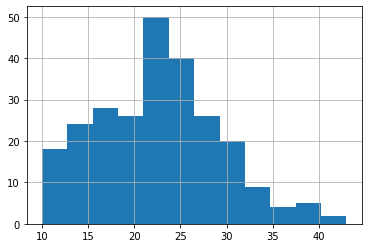

ACS
AxesSubplot(0.125,0.125;0.775x0.755)


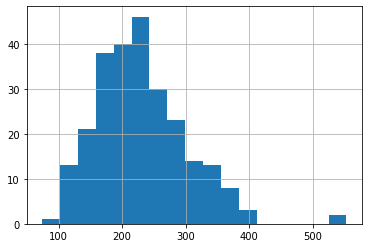

Econ
AxesSubplot(0.125,0.125;0.775x0.755)


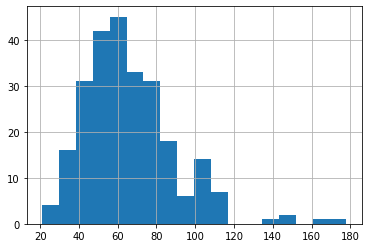

Enemy Losses
AxesSubplot(0.125,0.125;0.775x0.755)


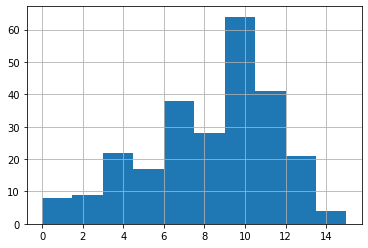

First Bloods
AxesSubplot(0.125,0.125;0.775x0.755)


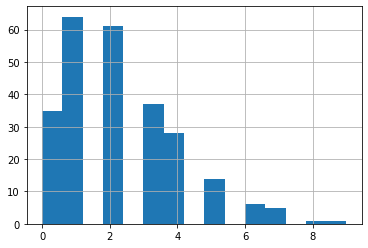

Plants
AxesSubplot(0.125,0.125;0.775x0.755)


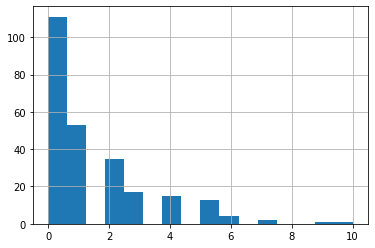

Defuses
AxesSubplot(0.125,0.125;0.775x0.755)


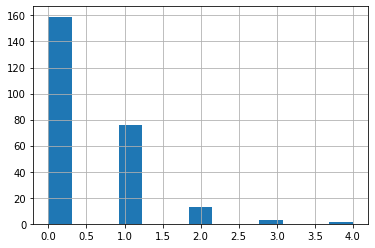

Kills
AxesSubplot(0.125,0.125;0.775x0.755)


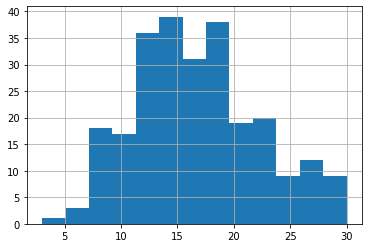

Deaths
AxesSubplot(0.125,0.125;0.775x0.755)


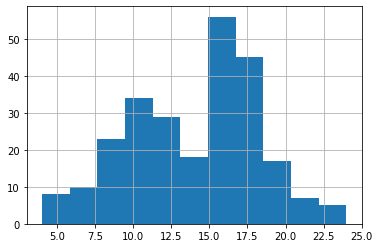

Assists
AxesSubplot(0.125,0.125;0.775x0.755)


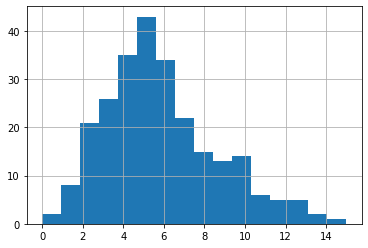

In [3]:
#Obtain a histogram of each data column
for i in range(len(data.columns)):
    currData = data[data.columns[i]]
    plt.figure() #to prevent figures from overlapping
    print(data.columns[i]) #title
    print(currData.hist(bins='auto'))
    plt.show() #display
    plt.close("all") #to prevent figures from overlapping

# Observations:
- Each of these data entries are integers
    - the X-axis scale could be reconfigured, later
- An exponential dstribution (needs confirmation) can be observed within the plants and defuses variables.
- Most other variables have a roughly normal distribution
    - at a later point in time, I will return using a QQ plot.

# Use Seaborn (sn) to generate a heatmap

Pearson correlation of elo gain and ACS:  0.7176250485464245
Pearson correlation of elo gain and Econ:  0.6978453298965703
Pearson correlation of elo gain and Enemy Losses:  -0.3804144117263042
Pearson correlation of elo gain and First Bloods:  0.32160623299928426
Pearson correlation of elo gain and Plants:  -0.023886016833846845
Pearson correlation of elo gain and Defuses:  0.10076008066612213
Pearson correlation of elo gain and Kills:  0.5274358782637524
Pearson correlation of elo gain and Deaths:  -0.46764003134014487
Pearson correlation of elo gain and Assists:  -0.06569622712237826


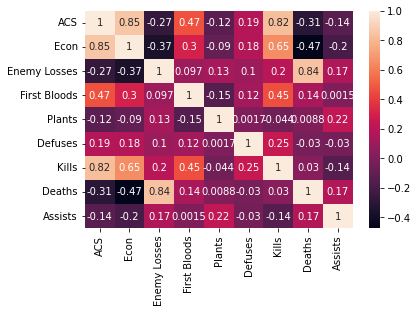

In [4]:
#print feature names
for featureNum,featureName in enumerate(data[data.columns[1:]]):
    print(f"Pearson correlation of elo gain and {featureName}: ", target_data.corr(data[data.columns[1+featureNum]]))

#Feature Pearson Correlation
corr_matrix = train_data.corr()
sn.heatmap(corr_matrix, annot=True)

plt.show()

# Heatmap Analysis
From the model above, we can identify several highly correlated features. 

- Econ Score and ACS: 0.85 r score
- Kills and ACS: 0.82 r score
- Deaths and Enemy Losses: 0.84 r score
- etc

This violates the assumption of independent predictor variables for Multiple Linear Regression (MLR), thus this simple, interpretable model cannot be used (a mistake I did not catch in my initial notebook), unless data normalization is done.

Going forward, XGBoost, a 'black-box' model will be used. Although its 'black-box' nature means that it is more difficult to interpret its findings, its increased predictive accuracy over MLR and more naive (simpler) algorithms indicate (more patterns learned from) (needs a new word) the dataset.

# Todo: Feature Selection and Training for MLR

# XGBoost Model Building

In [5]:

#models for regression
from xgboost import XGBRegressor

#EDA
from matplotlib import pyplot

#hyperparameter tuning 
from sklearn.model_selection import RandomizedSearchCV

#evaluation metric for regression
from sklearn.metrics import r2_score


In [6]:
#Stating possible XGBoost hyperparameters
XGBparams = {
#size = 960
 'learning_rate': [0.05, 0.10, 0.15, 0.20],
 'max_depth': [4, 6, 8, 10],
 'min_child_weight': [1, 3, 5],
 'colsample_bytree': [ 0.4, 0.6, 0.8, 1.0 ],
 'n_estimators': [50,75,100,125,150]
}

Fitting 4 folds for each of 120 candidates, totalling 480 fits
XGBoost Feature Importance:


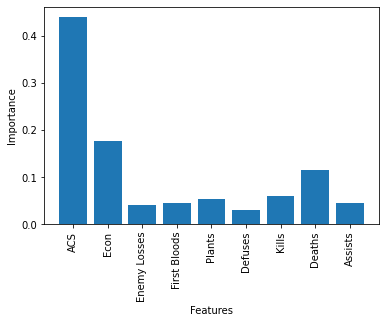

Here's the R squared
0.7904972509308105


In [7]:
seed = 42

data = pd.read_csv('/kaggle/input/valorant-kills/Math IA Data Collection - Copy of exportData.csv')

target_data = data[data.columns[0]]
train_data = data[data.columns[1:]]


XGBr = XGBRegressor()
#search a quarter of hyperparameter space, since XGBoost is slow, 960/4 = 240
XGBr_opt = RandomizedSearchCV(XGBr,param_distributions=XGBparams,n_iter=120,scoring='neg_mean_squared_error', n_jobs=-1,cv=4,verbose=1,random_state = seed)

XGBr_opt.fit(train_data, target_data)
XGBr = XGBr_opt.best_estimator_

#find feature importance
importance = XGBr.feature_importances_

# plot feature importance
print("XGBoost Feature Importance:")
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.xticks(range(len(importance)), train_data.columns, rotation=90)
pyplot.xlabel('Features')
pyplot.ylabel('Importance')
pyplot.show()

#evaluate model
#lol data leakage
XGBr_pred = XGBr.predict(train_data)
XGBr_r2 = r2_score(target_data, XGBr_pred)

print("Here's the R squared")
print(XGBr_r2)


# Analysis of R Squared and Feature Importance
- From the XGBoost model, we can observe an R Squared value of 0.79, indicating a relatively high model score.
- From the feature importance, we can see the great importance of ACS on RR gain
	- We can conclude that to optimize RR gain, one mut prioritize their ACS score, before other statistics.

# Conclusion

In this notebook, we explored the quantitative effects of features on RR gain. A 0.79 r^2 value was obtained with an XGBoost model, demonstrating noise caused by Valorant's hidden MMR system. We discovered that ACS is the most important statistic to prioritize in order to get ahead of the competition.



# Further Exploration of this Topic


This project could be improved with further EDA (checking normality assumptions and multicollinearity and homoskedacicity,etc), data engineering; including combining features, and properly testing for correlated features and data transformations (normalizing data, etc), creating confidence intervals for the model weights, and overall improving the quality of code.

For further research, more recent data could be gathered, as well as a larger quantity of data, and with a proper sampling method.

Here's more stuff you can do before I get to it:
- feature engineering
- improving code quality
- other models
- add proper feature importance 